In [371]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import regex as re

In [372]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [373]:
df = pd.read_csv('mg_eda_univariate_analysis_dataset.csv')

In [374]:
df.head()

id  \
0  cardid69429251   
1  cardid69427147   
2  cardid71764335   
3  cardid71631505   
4  cardid72558997   

                                                                                                                                            url  \
0      https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531   
1   https://www.magicbricks.com/propertydetails/3-bhk-1905-sq-ft-multistorey-apartment-for-sale-kharghar-in-navi-mumbai&id=4d423639343237313437   
2     https://www.magicbricks.com/propertydetails/2-bhk-623-sq-ft-multistorey-apartment-for-sale-dahisar-east-in-mumbai&id=4d423731373634333335   
3  https://www.magicbricks.com/propertydetails/2-bhk-702-sq-ft-multistorey-apartment-for-sale-jogeshwari-east-in-mumbai&id=4d423731363331353035   
4          https://www.magicbricks.com/propertydetails/1-bhk-608-sq-ft-multistorey-apartment-for-sale-govandi-in-mumbai&id=4d423732353538393937   

                                                                                                                                                   image  \
0  https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg   
1                    https://img.staticmb.com/mbimages/project/photo_h310_w462/project-photo-28-sai-world-empire-navi-mumbai-5088768_600_800_310_462.jpg   
2                 https://img.staticmb.com/mbimages/project/photo_h310_w462/2021/11/30/project-photo-4-northern-hills-mumbai-5233377_600_800_310_462.jpg   
3             https://img.staticmb.com/mbimages/project/photo_h310_w462/2024/02/29/project-photo-13-avant-heritage-v-mumbai-5419271_899_1600_310_462.jpg   
4                      https://img.staticmb.com/mbimages/project/photo_h310_w462/2024/05/10/project-photo-5-centrionx-mumbai-5420523_533_800_310_462.jpg   

                                                    address  \
0                          pokhran road, thane, maharashtra   
1  kharghar, navi mumbai - central navi mumbai, maharashtra   
2        dahisar east, mumbai - western mumbai, maharashtra   
3     jogeshwari east, mumbai - western mumbai, maharashtra   
4               govandi, mumbai - harbour line, maharashtra   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

# price with categorical columns 

# construction

In [375]:
df['construction'].value_counts()

construction
under construction    4558
less than 5 years     1508
new construction      1467
5 to 10 years         1405
10 to 15 years         944
above 20 years         495
15 to 20 years         458
Name: count, dtype: int64

In [376]:
import pandas as pd

# Define custom construction order
construction_order = [
    'under construction', 
    'new construction', 
    'less than 5 years', 
    '5 to 10 years', 
    '10 to 15 years', 
    '15 to 20 years', 
    'above 20 years'
]

# Set the 'construction' column to have the custom order
df['construction'] = pd.Categorical(df['construction'], categories=construction_order, ordered=True)


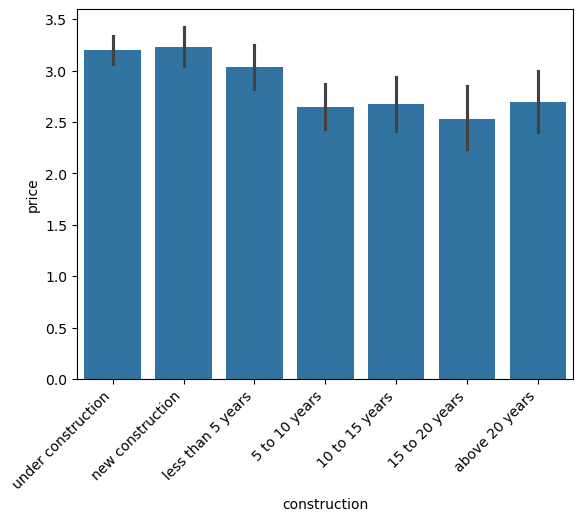

In [377]:
# using price mean 
sns.barplot(data=df, x='construction', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

In [378]:
# Create a pivot table to show the average price for each construction category
pivot_table = df.pivot_table(values='price', index='construction', aggfunc='mean')

# Display the pivot table
print(pivot_table)


                       price
construction                
under construction  3.195886
new construction    3.225502
less than 5 years   3.031840
5 to 10 years       2.650215
10 to 15 years      2.674185
15 to 20 years      2.525795
above 20 years      2.696503


C:\Users\ABC\AppData\Local\Temp\ipykernel_12624\4219599046.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='price', index='construction', aggfunc='mean')


### observation 

- The mean price of properties less than 5 years old is higher than that of properties older than 5 years.  
- The mean price of properties less than 5 years old ranges from 3 to 3.22 crores.  
- The mean price of properties older than 5 years ranges from 2.52 to 2.69 crores.  
- The mean price of under-construction and newly constructed properties is almost the same.  
- Properties older than 20 years have a higher mean price than those 15–20 years old, which seems unfair.  

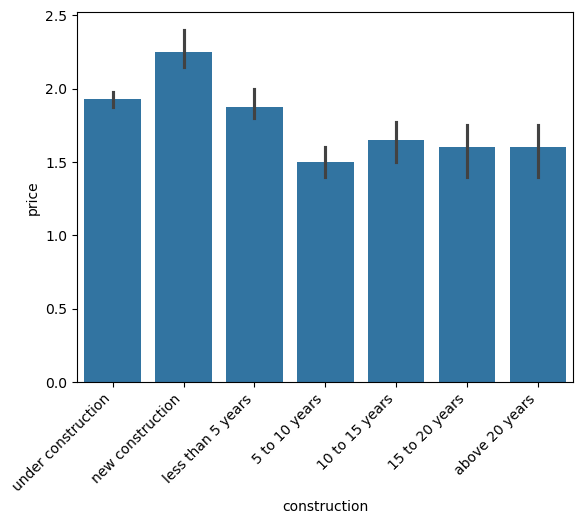

In [379]:
#using price median 
sns.barplot(data=df, x='construction', y='price',estimator = np.median)
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

In [380]:
# Create a pivot table to show the average price for each construction category
pivot_table = df.pivot_table(values='price', index='construction', aggfunc='median')

# Display the pivot table
print(pivot_table)


                    price
construction             
under construction  1.930
new construction    2.250
less than 5 years   1.875
5 to 10 years       1.500
10 to 15 years      1.650
15 to 20 years      1.600
above 20 years      1.600


C:\Users\ABC\AppData\Local\Temp\ipykernel_12624\2171633726.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='price', index='construction', aggfunc='median')


### Observations  

- Newly constructed properties have the highest median price.  
- The median price of all other properties aligns with their respective age categories.  

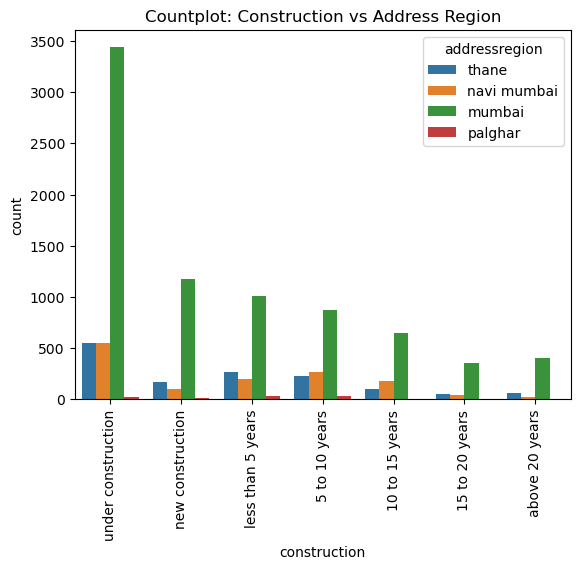

In [381]:
sns.countplot(x='construction', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Countplot: Construction vs Address Region")
plt.show()

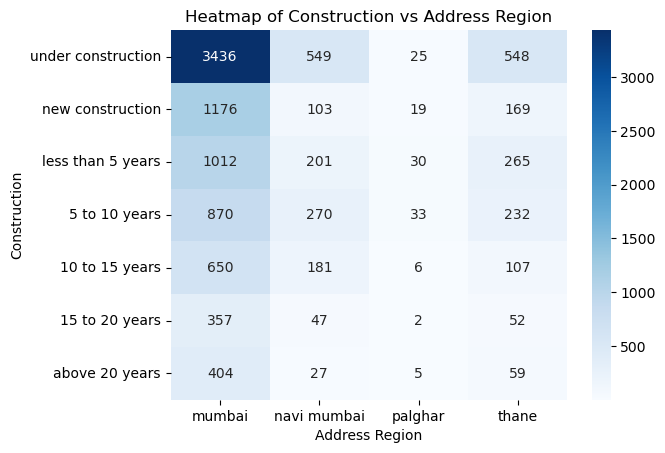

In [382]:
# Create a crosstab
cross_tab = pd.crosstab(df['construction'], df['addressregion'])

# Plot heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of Construction vs Address Region")
plt.xlabel("Address Region")
plt.ylabel("Construction")
plt.show()

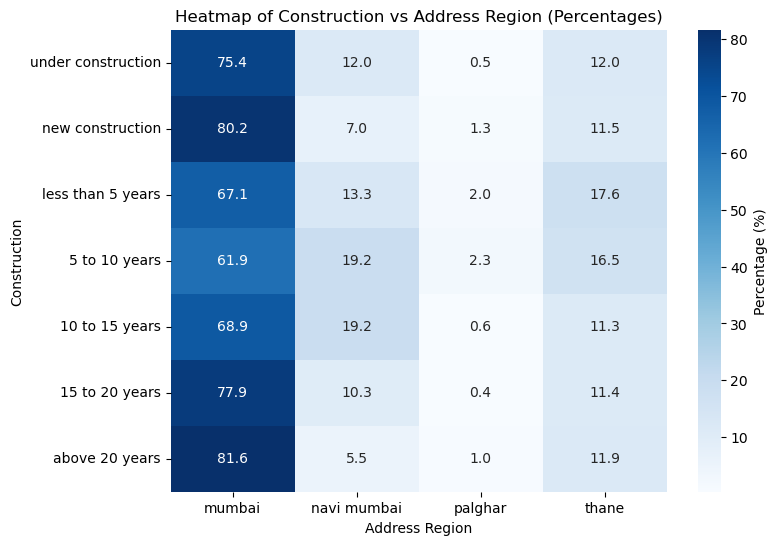

In [383]:
# Create a crosstab of counts
cross_tab = pd.crosstab(df['construction'], df['addressregion'])

# Normalize the crosstab to show percentages
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot heatmap with percentages
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(cross_tab_percentage, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Percentage (%)'})
plt.title("Heatmap of Construction vs Address Region (Percentages)")
plt.xlabel("Address Region")
plt.ylabel("Construction")
plt.show()

### observation 
- The highest number of properties across all construction ages are found in the following order: Mumbai > Thane & Navi Mumbai > Palghar.

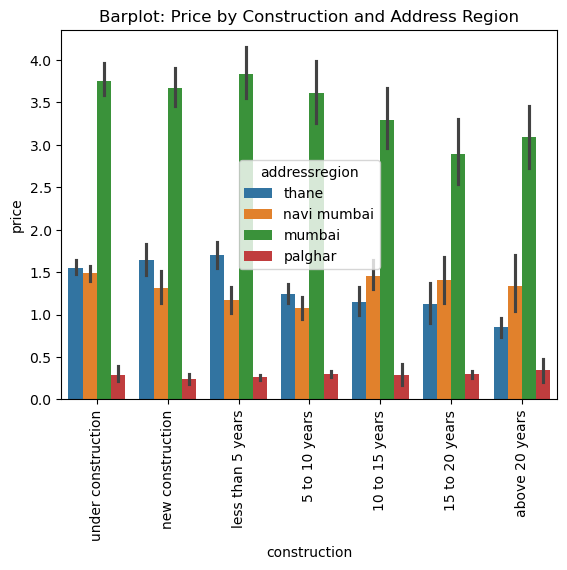

In [384]:
sns.barplot(x='construction', y='price', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observation
- mean price for less than 10 year age of properties follows this trend : Mumbai > Thane > Navi Mumbai > Palghar
- mean price for older than 10 year age of properties follows this trend : Mumbai > Navi Mumbai > Thane > Palghar
- above 15 year old properties are less expensive compare to other age of contruction for mumbai region

In [385]:
# Create a pivot table to show the average price for each combination of construction category and address region
pivot_table = df.pivot_table(values='price', index='construction', columns='addressregion', aggfunc='mean')

# Display the pivot table
print(pivot_table)


addressregion         mumbai  navi mumbai   palghar     thane
construction                                                 
under construction  3.752372     1.484982  0.290400  1.553250
new construction    3.667692     1.317854  0.237947  1.647012
less than 5 years   3.832409     1.165493  0.259733  1.704000
5 to 10 years       3.602953     1.074304  0.299636  1.245832
10 to 15 years      3.286214     1.459000  0.286000  1.145766
15 to 20 years      2.889969     1.407872  0.295000  1.121827
above 20 years      3.084960     1.337037  0.345000  0.857966


C:\Users\ABC\AppData\Local\Temp\ipykernel_12624\3495475031.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='price', index='construction', columns='addressregion', aggfunc='mean')


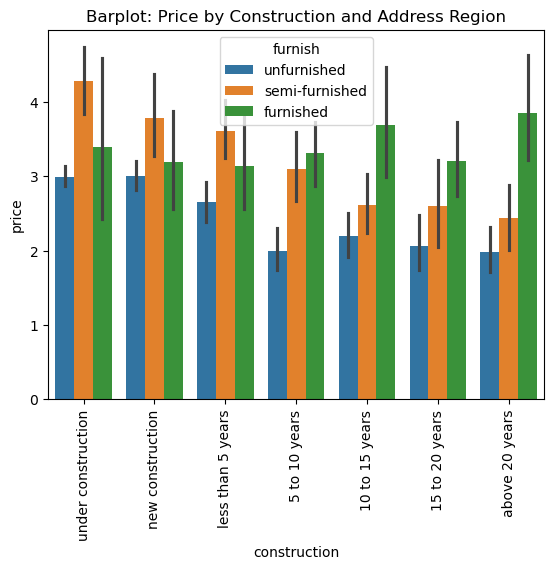

In [386]:
sns.barplot(x='construction', y='price', hue='furnish', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

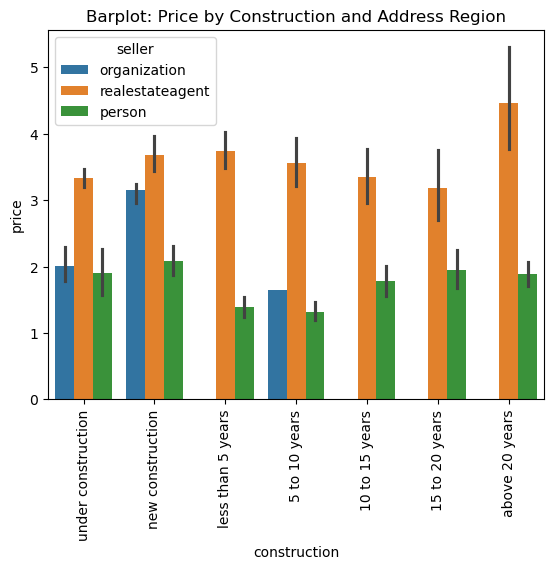

In [387]:
sns.barplot(x='construction', y='price', hue='seller', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observation 
- Sellers who list properties across all construction ages follow this price hierarchy: Real Estate Agent > Organization > person. This means that when a property is sold through a real estate agent, its price is generally higher whether they are newly constructed or old.
- 

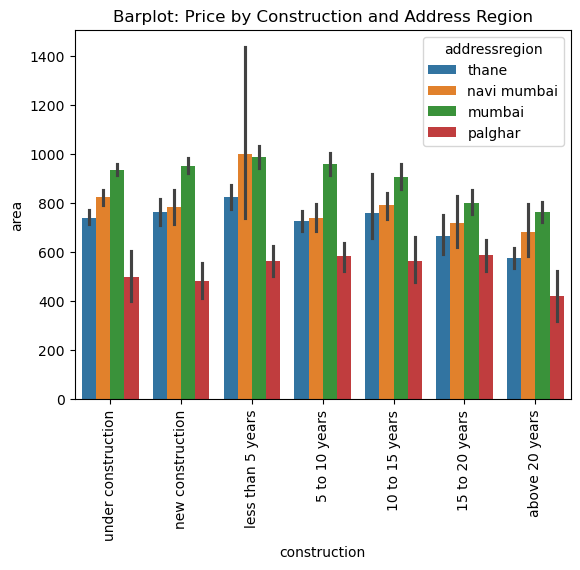

In [388]:
sns.barplot(x='construction', y='area', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observattion 
- The mean area of properties across all construction ages follows the trend: Mumbai > Navi Mumbai >Thane > Palghar.

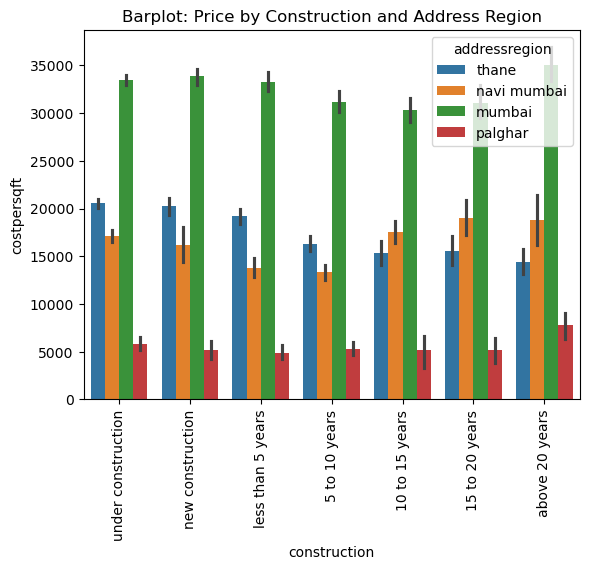

In [389]:
sns.barplot(x='construction', y='costpersqft', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observation
- mean costpersqft for less than 10 year age of properties follows this trend : Mumbai > Thane > Navi Mumbai > Palghar
- - mean costpersqft for older than 10 year age of properties follows this trend : Mumbai > Navi Mumbai > Thane > Palghar

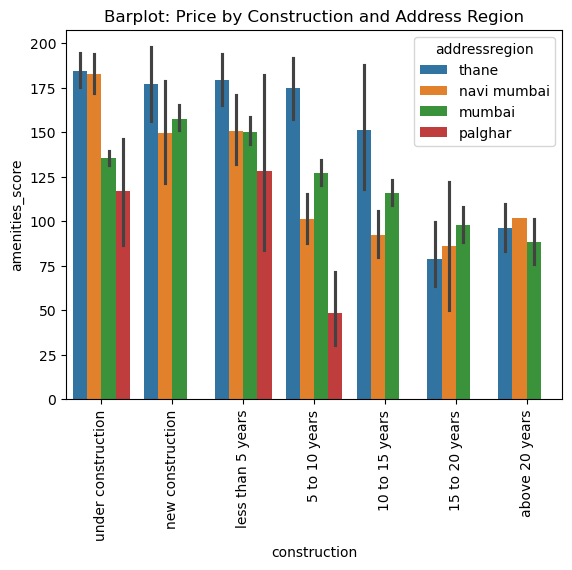

In [390]:
sns.barplot(x='construction', y='amenities_score', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()

### observation
- mean amenities_score for less than 15 year age of properties follows this trend :  Thane > mumbai & Navi Mumbai > Palghar
- under construction properties Thane and navi mumbai region have more amenities than the mumbai region

In [391]:
# Define price bins and labels
price_bins = [0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 9.99, 14.99, 20.00, float('inf')]
price_labels = [
    "0.00 - 0.99", "1.00 - 1.99", "2.00 - 2.99", "3.00 - 3.99", "4.00 - 4.99", 
    "5.00 - 5.99", "6.00 - 6.99", "7.00 - 7.99", "8.00 - 8.99", "9.00 - 9.99", 
    "10.00 - 14.99", "15.00 - 20.00", "20.00 and above"
]

# Use pd.cut to categorize the prices
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=True)

# Count the occurrences in each category
category_counts = df['price_category'].value_counts().sort_index()

# Print the result
print(category_counts)

price_category
0.00 - 0.99        3165
1.00 - 1.99        3467
2.00 - 2.99        2002
3.00 - 3.99        1073
4.00 - 4.99         573
5.00 - 5.99         415
6.00 - 6.99         294
7.00 - 7.99         189
8.00 - 8.99         140
9.00 - 9.99         102
10.00 - 14.99       243
15.00 - 20.00       109
20.00 and above     126
Name: count, dtype: int64


In [392]:
df.to_excel('analysis_dataset.xlsx',index=False)

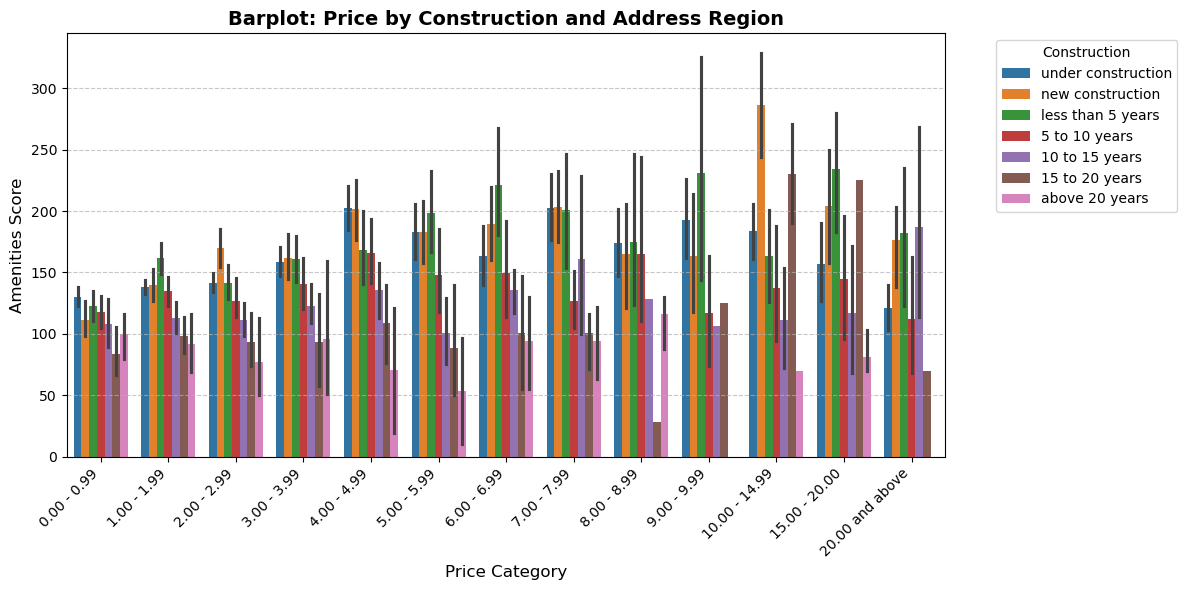

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the bar plot with the specified hue order
sns.barplot(x='price_category', y='amenities_score', hue='construction', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a title and labels for clarity
plt.title("Barplot: Price by Construction and Address Region", fontsize=14, weight='bold')
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Amenities Score", fontsize=12)

# Reposition the legend to avoid overlap with the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Construction')

# Add grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


### Observations  
- Overall, for properties priced between 0 to 8 cr, the amenities score decreases within each price category, following this trend: under construction > less than 5 years > new construction > 10 to 15 years > 5 to 10 years > 15 to 20 years > above 20 years.  
- As the price category increases, the overall amenities score also increases up to 6 cr properties, but beyond that, the trend is less clear.  
- For properties above 10 cr, the amenities score trend for newly constructed, under-construction, and 15 to 20-year-old properties follows: '10-14.99' > '15-20' > '20 and above'.  
- Among properties above 10 cr, newly constructed properties have a higher amenities score than under-construction properties.  

C:\Users\ABC\AppData\Local\Temp\ipykernel_12624\3291055384.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(


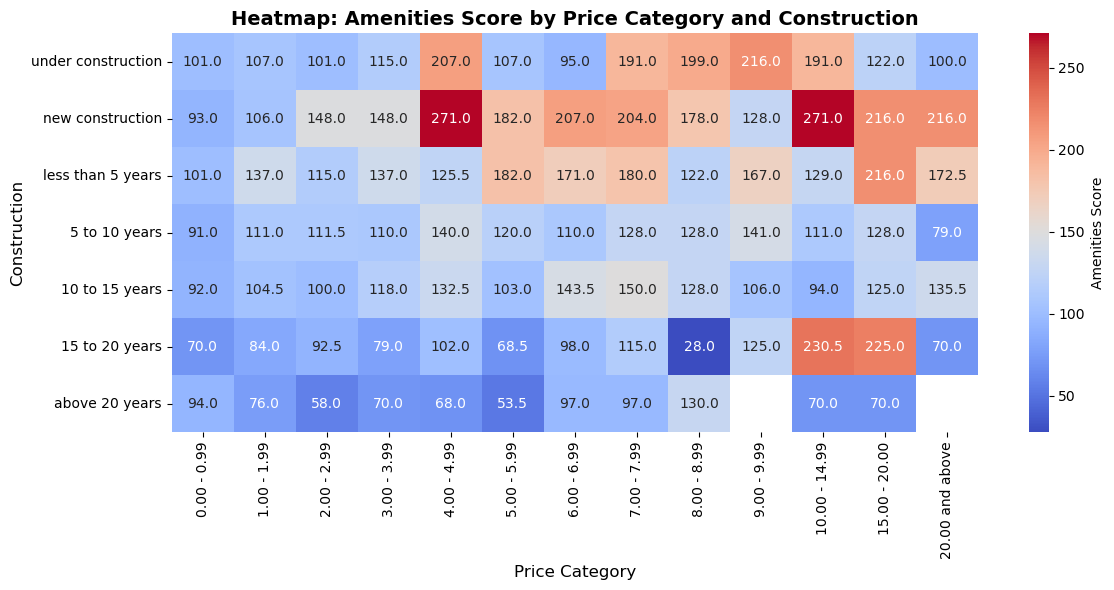

In [394]:
pivot_df = df.pivot_table(
    index='construction', 
    columns='price_category', 
    values='amenities_score', 
    aggfunc='median'  # Adjust based on your data
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Amenities Score'})

# Add labels and title
plt.title("Heatmap: Amenities Score by Price Category and Construction", fontsize=14, weight='bold')
plt.xlabel("Price Category", fontsize=12)
plt.ylabel("Construction", fontsize=12)

plt.tight_layout()
plt.show()


### Observations:
- The graph shows the median of amenities scores based on grouping by amenities score and construction.
- As shown below, most properties in the above 5 crore price range are from Mumbai, so the amenities score is primarily from the Mumbai re (Mumbai accounts for the largest share of properties in that price category.)gion.
- Properties above 4 crore, including those that are under construction, new construction, and less than 5 years old (mostly from Mumbai), have a high amenities score.
- Properties in the 0 to 3 crore range have an amenities score below 150, as most regions in this price range have properties.

C:\Users\ABC\AppData\Local\Temp\ipykernel_12624\3854120254.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['price_category', 'construction', 'addressregion']).size().reset_index(name='count')


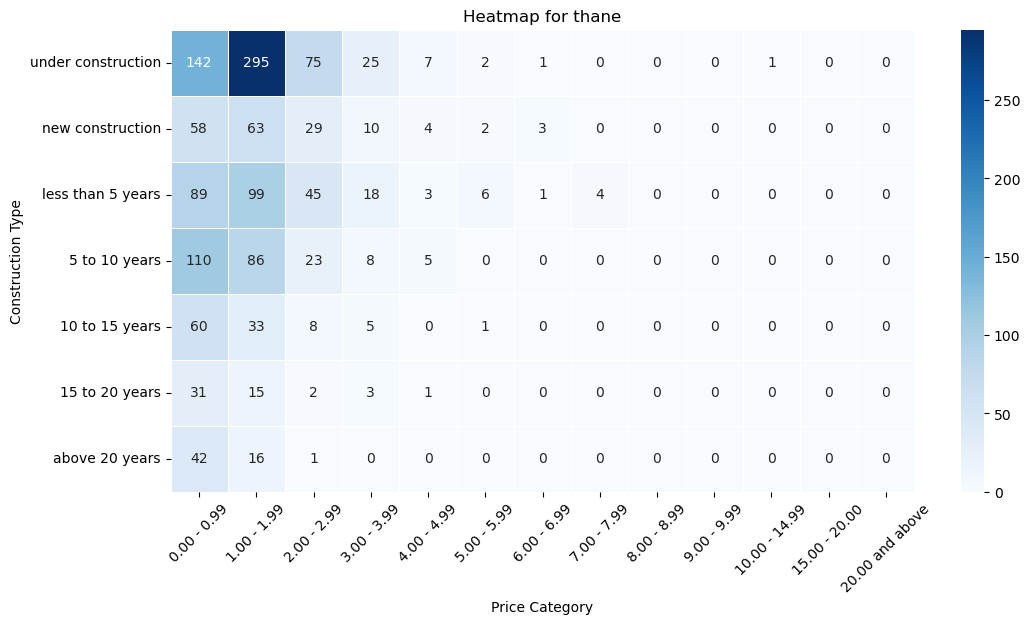

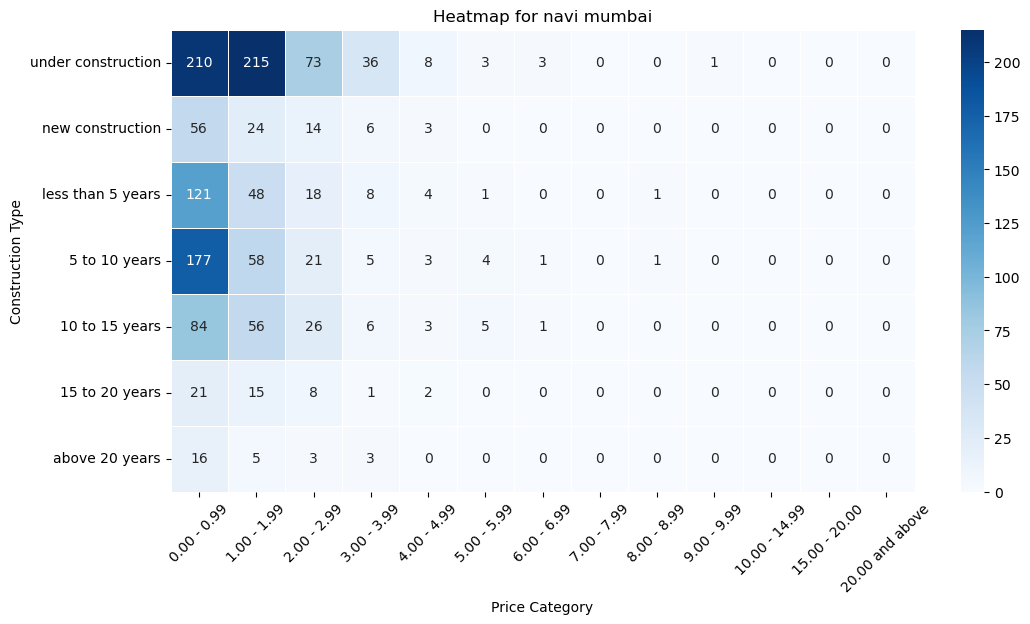

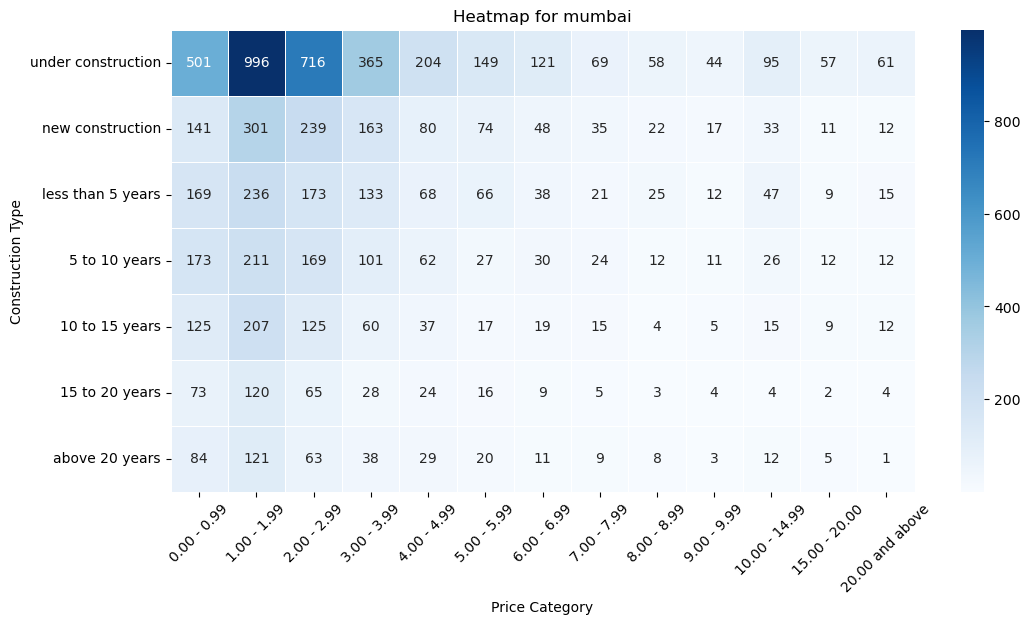

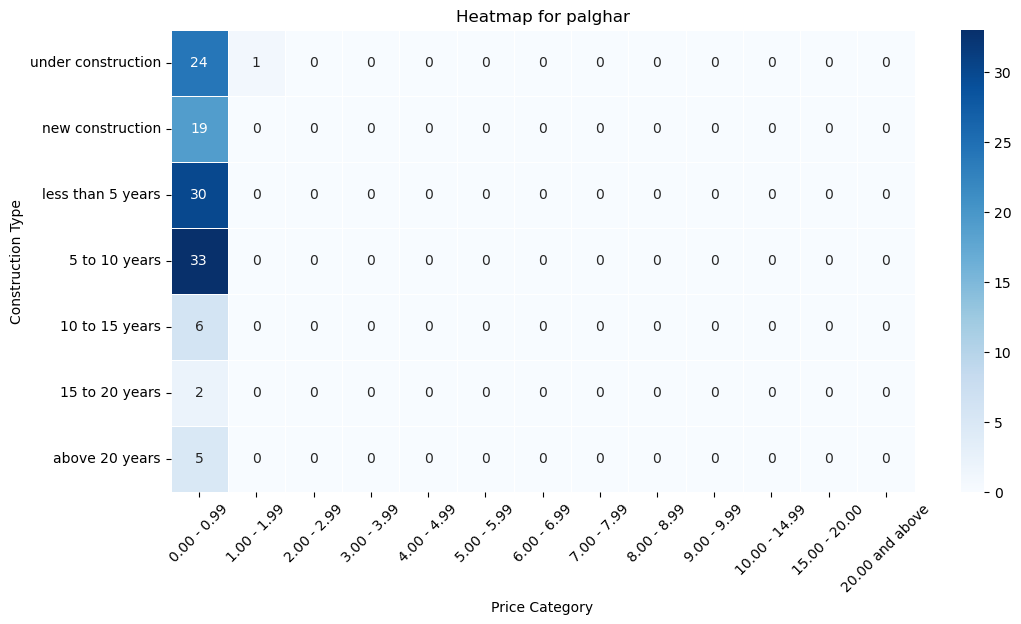

In [395]:
# Count occurrences
heatmap_data = df.groupby(['price_category', 'construction', 'addressregion']).size().reset_index(name='count')

# Pivot for heatmap (reshape so each addressregion has its own heatmap)
for region in df['addressregion'].unique():
    pivot_df = heatmap_data[heatmap_data['addressregion'] == region].pivot(index='construction', columns='price_category', values='count')

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='.0f', linewidths=0.5)
    plt.title(f'Heatmap for {region}')
    plt.xlabel('Price Category')
    plt.ylabel('Construction Type')
    plt.xticks(rotation=45)
    plt.show()

### observation 
- most of the properties above 5cr region are from mumbai and thane ,palghar,navi mumbai wont have properties in that price range so this can create bias
- palghar wont have properties above 1cr
- Under construction properties dominate in all regions except Palghar, which may indicate a bias toward newer development projects.

C:\Users\ABC\AppData\Local\Temp\ipykernel_12624\1742156435.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['price_category', 'construction', 'addressregion'])['amenities_score'].mean().reset_index()


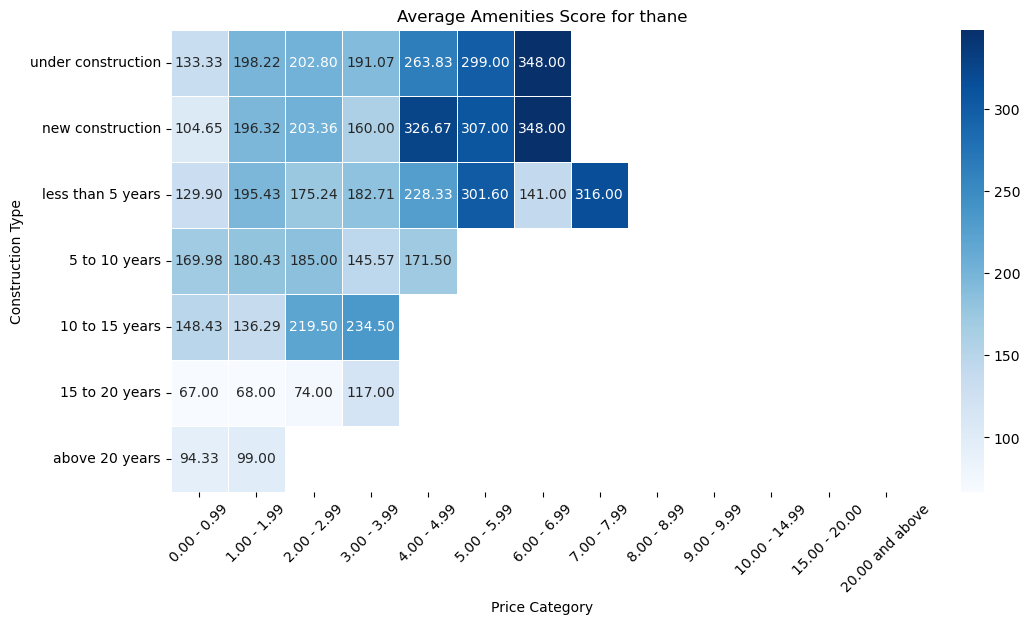

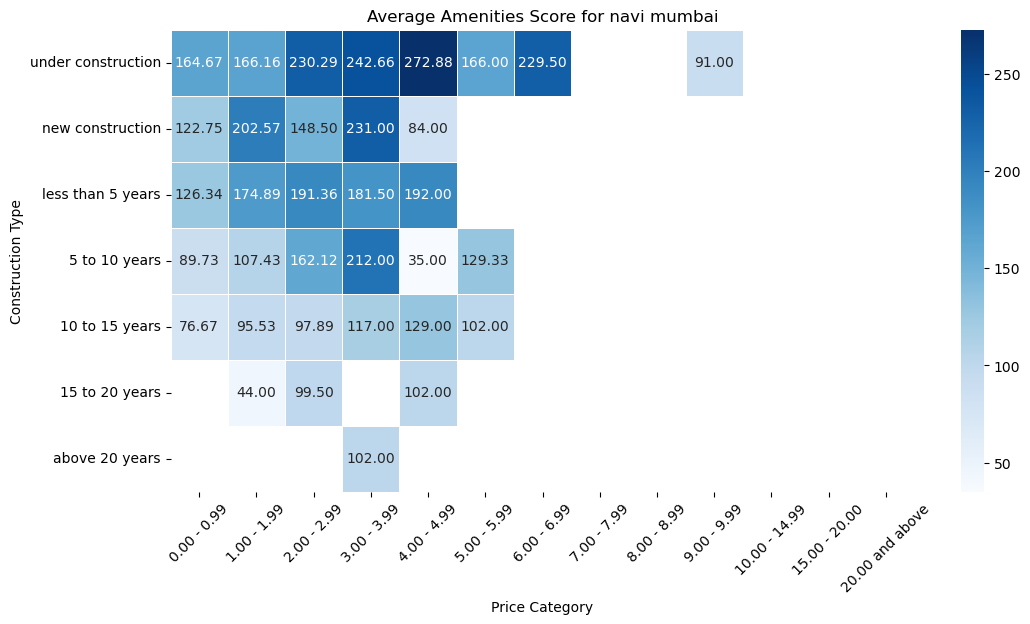

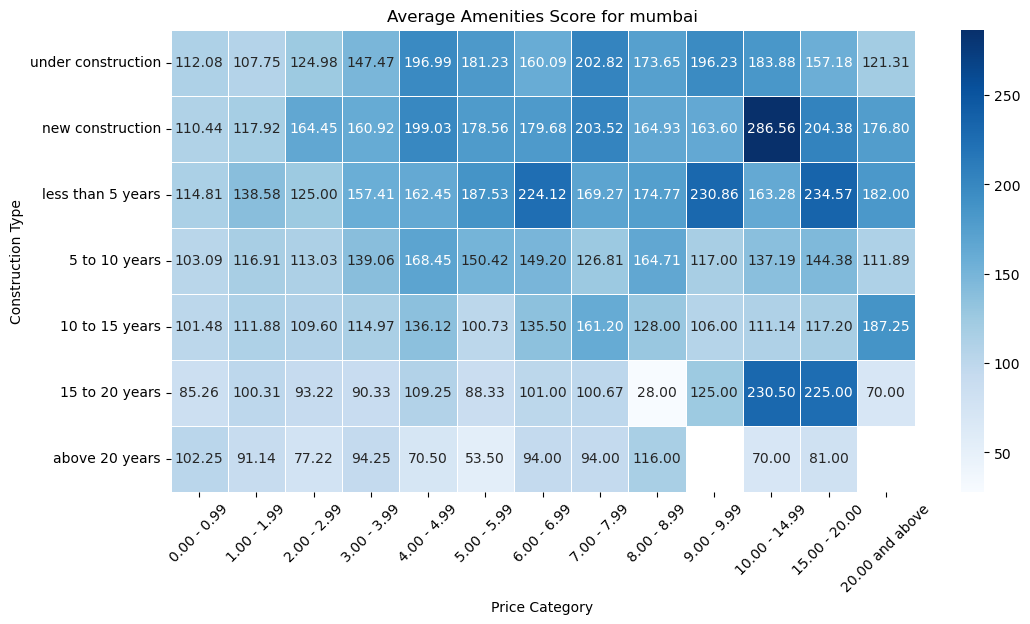

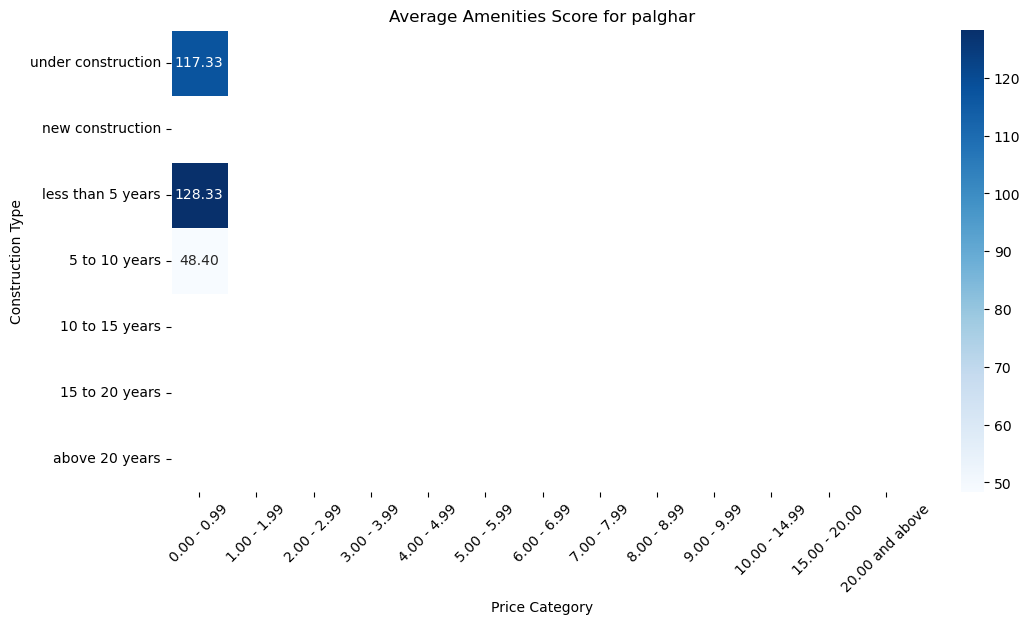

In [396]:
# Compute the average amenities score
heatmap_data = df.groupby(['price_category', 'construction', 'addressregion'])['amenities_score'].mean().reset_index()

# Plot heatmap for each address region
for region in df['addressregion'].unique():
    pivot_df = heatmap_data[heatmap_data['addressregion'] == region].pivot(index='construction', columns='price_category', values='amenities_score')

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
    plt.title(f'Average Amenities Score for {region}')
    plt.xlabel('Price Category')
    plt.ylabel('Construction Type')
    plt.xticks(rotation=45)
    plt.show()

### observation 
- The amenities score should ideally increase as the price range moves from 0 to above 20 crores. However, this is not the case in most scenarios. A possible reason could be the high variance in the number of properties.
- most of the plots are empty because of no properties

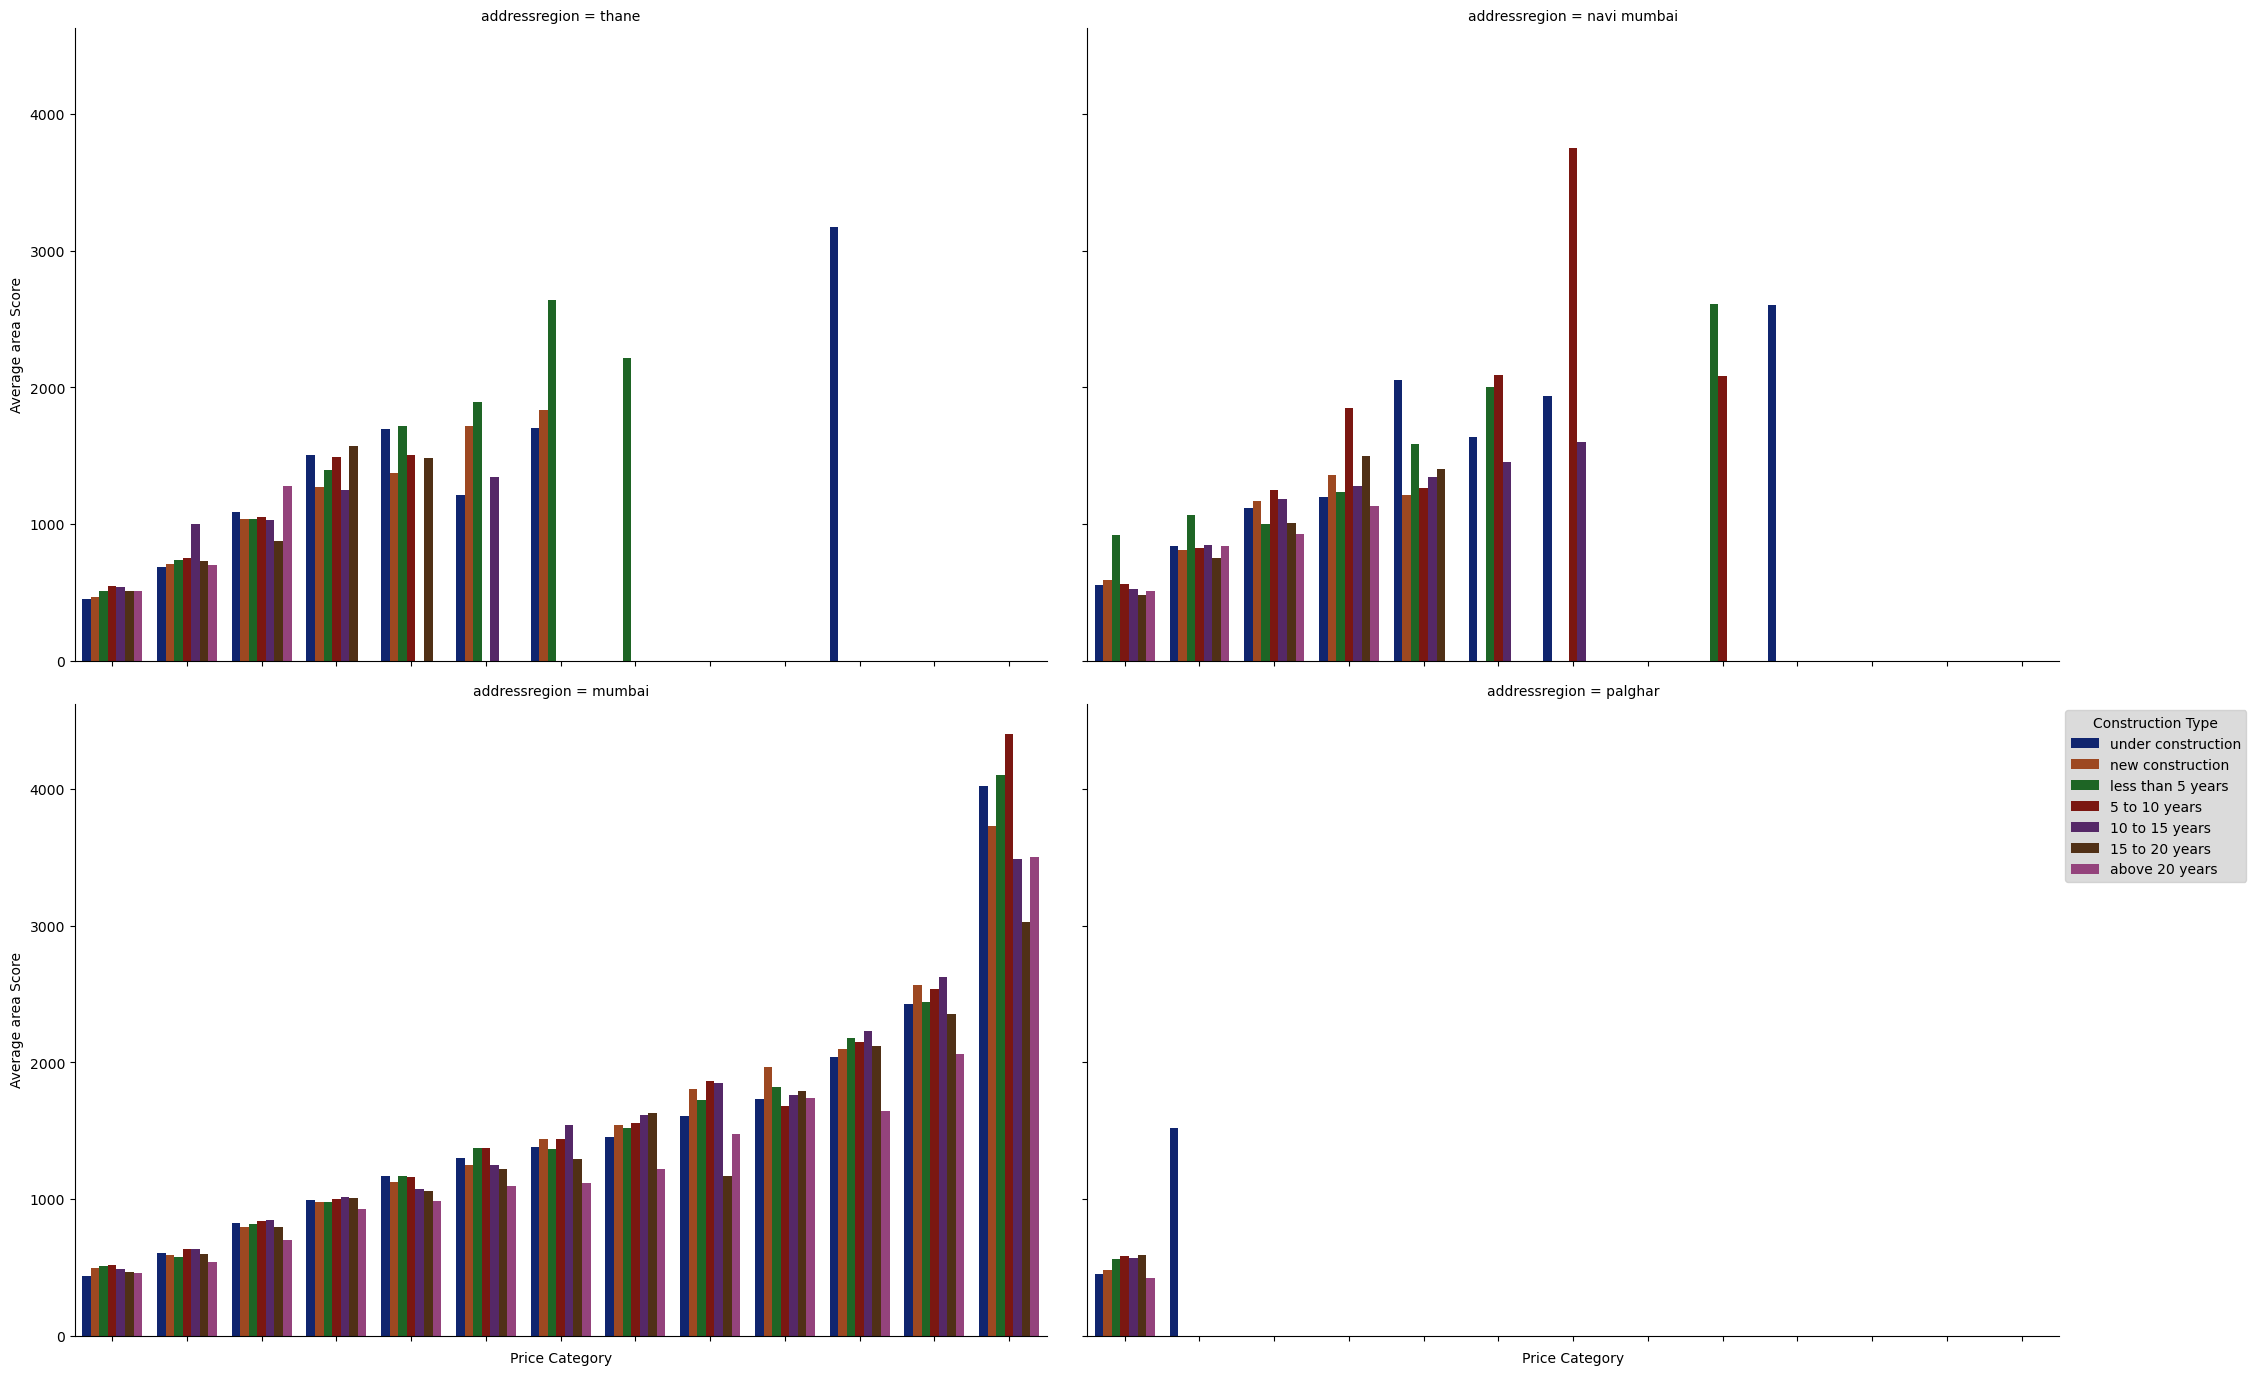

In [397]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a dark color palette with limited colors
palette = sns.color_palette("dark", n_colors=df["construction"].nunique())  

# Create FacetGrid for multiple bar plots with larger plot dimensions
g = sns.FacetGrid(df, col="addressregion", col_wrap=2, height=7, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x="price_category", y="area", hue="construction", errorbar=None, palette=palette)

# Rotate x-axis labels and set axis labels
g.set_xticklabels(rotation=45)
g.set_axis_labels("Price Category", "Average area Score")

# Add a single legend and adjust size
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Construction Type', frameon=True, facecolor='lightgrey')

# Show plot
plt.show()


### observation
- overall trend is as the area increases, the price of the property also increases.  
- Within each price range, each construction type has different property areas.  
- For propertiein mumbai region s priced at 1 crore and above, those older than 15 years generally have less area compared to other construction types within the same price range category.

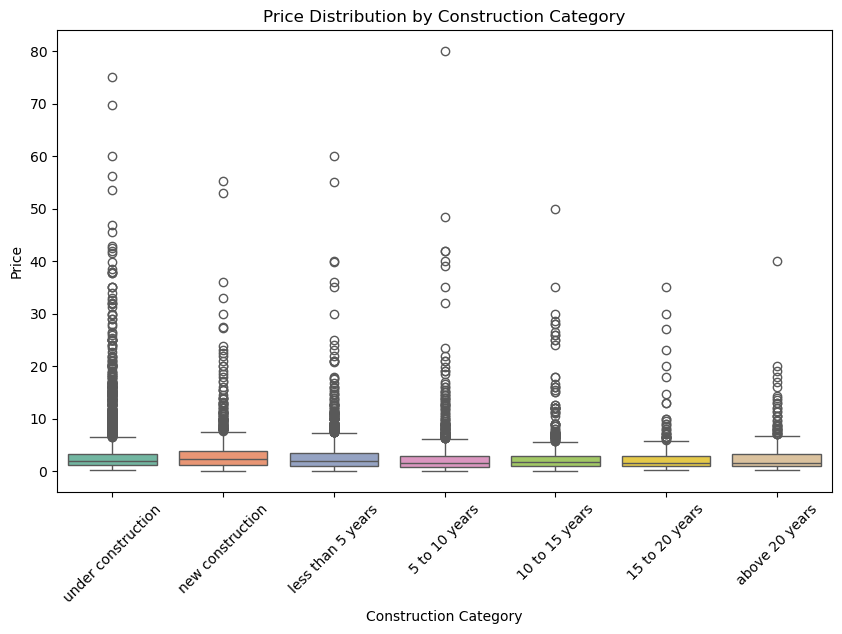

In [398]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="construction", y="price", hue="construction", palette="Set2", legend=False)

plt.title("Price Distribution by Construction Category")
plt.xlabel("Construction Category")
plt.ylabel("Price")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [399]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
percentiles = df.groupby("construction")["price"].quantile([0.25, 0.75]).unstack()

# Rename the columns correctly
percentiles.columns = ["Q1 (25th Percentile)", "Q3 (75th Percentile)"]

# Compute IQR
percentiles["IQR"] = percentiles["Q3 (75th Percentile)"] - percentiles["Q1 (25th Percentile)"]

# Compute Upper Whisker
percentiles["Upper Whisker"] = percentiles["Q3 (75th Percentile)"] + (1.5 * percentiles["IQR"])

# Display the result
print(percentiles[["Q1 (25th Percentile)", "Q3 (75th Percentile)", "Upper Whisker"]])


                    Q1 (25th Percentile)  Q3 (75th Percentile)  Upper Whisker
construction                                                                 
under construction                1.1500                3.3175        6.56875
new construction                  1.2200                3.7750        7.60750
less than 5 years                 0.9300                3.5000        7.35500
5 to 10 years                     0.7000                2.9100        6.22500
10 to 15 years                    0.9000                2.8000        5.65000
15 to 20 years                    0.9275                2.9000        5.85875
above 20 years                    0.9000                3.2500        6.77500


C:\Users\ABC\AppData\Local\Temp\ipykernel_12624\4158790170.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentiles = df.groupby("construction")["price"].quantile([0.25, 0.75]).unstack()


### observation 
- 50% of properties in all age of construction is between 70lakh to 4cr 
- higher than 8 cr properties in all age of construction are outliers
- under construction properties have higher number of outlires 

# overlooking 

In [400]:
df['overlooking'].value_counts().index

Index(['main road', 'garden/park, main road', 'garden/park, main road, pool',
       'garden/park', 'garden/park, pool', 'pool', 'main road, pool'],
      dtype='object', name='overlooking')

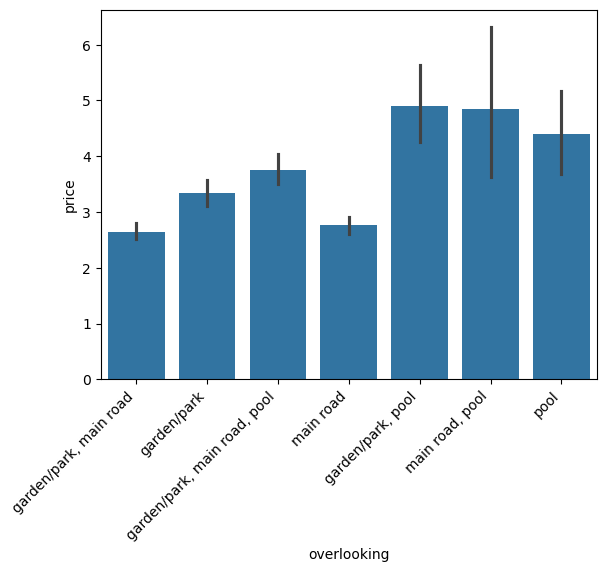

In [401]:
# using price mean 
sns.barplot(data=df, x='overlooking', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

In [402]:
# Create a pivot table to show the average price for each construction category
pivot_table = df.pivot_table(values='price', index='overlooking', aggfunc='mean')

# Display the pivot table
print(pivot_table)


                                 price
overlooking                           
garden/park                   3.332119
garden/park, main road        2.647437
garden/park, main road, pool  3.756593
garden/park, pool             4.904027
main road                     2.763878
main road, pool               4.839492
pool                          4.392078


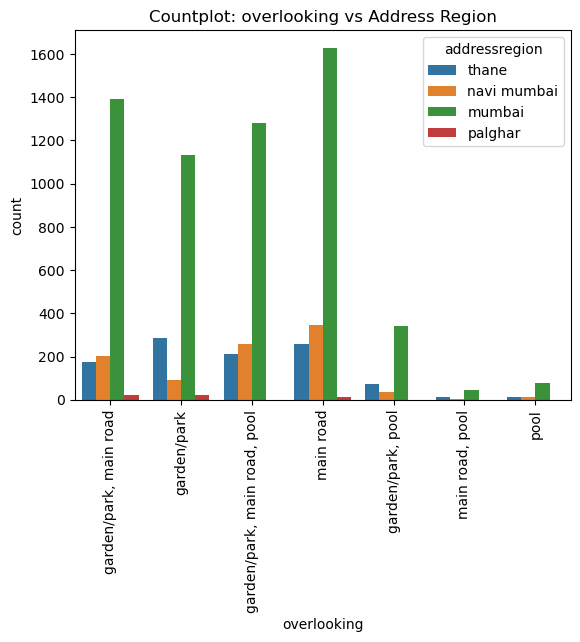

In [403]:
sns.countplot(x='overlooking', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Countplot: overlooking vs Address Region")
plt.show()

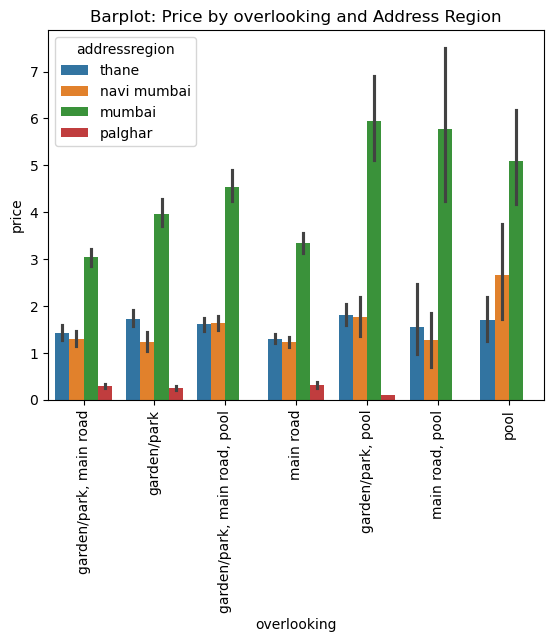

In [404]:
sns.barplot(x='overlooking', y='price', hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by overlooking and Address Region")
plt.show()

## method 1: assign weighatage 

In [405]:
df['overlooking'].isna().sum()

3969

In [406]:
df['overlooking'].value_counts()

overlooking
main road                       2242
garden/park, main road          1790
garden/park, main road, pool    1749
garden/park                     1536
garden/park, pool                451
pool                             102
main road, pool                   59
Name: count, dtype: int64

In [407]:
df['overlooking'] = df['overlooking'].fillna('unknown')

In [408]:
# Define the weightage for each flooring type
weightages = {
    "main road": 5,
    "garden/park": 8,
    "pool": 9
}


# Function to calculate the combination score
def calculate_combination_score(overlooking_combination):
    overlooking_types = [f.strip().lower() for f in overlooking_combination.split(",")]
    total_weight = sum(weightages.get(f, 0) for f in overlooking_types)
    #combination_score = total_weight / len(overlooking_types)
    return round(total_weight, 2)

# Apply the function to the dataframe
df["overlooking_score"] = df["overlooking"].apply(calculate_combination_score)

In [409]:
df[['overlooking',"overlooking_score"]].sample(10)

,overlooking,overlooking_score
1531,unknown,0
9571,unknown,0
5537,"garden/park, main road",13
6194,unknown,0
2748,"garden/park, main road, pool",22
11009,main road,5
3206,"garden/park, main road, pool",22
7084,"garden/park, main road",13
11698,unknown,0
7789,"garden/park, pool",17


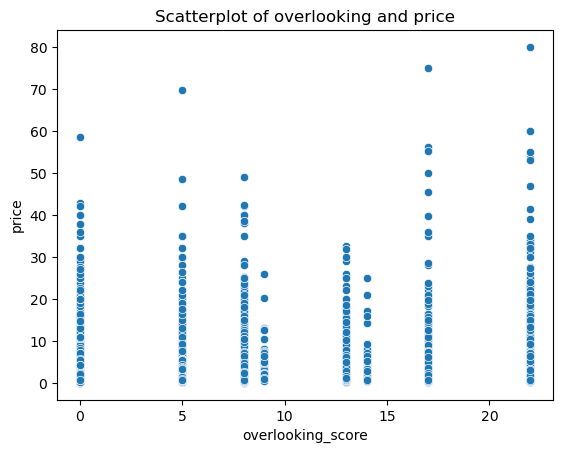

In [410]:
# Filter data for 'mumbai'
#filtered_df = df[df['addressregion'] == 'thane']

sns.scatterplot(x=df['overlooking_score'], y=df['price'])

# Add labels and title
plt.xlabel('overlooking_score')
plt.ylabel('price')
plt.title('Scatterplot of overlooking and price')
#plt.legend(title='Address Region')
plt.show()

In [411]:
df[df['overlooking_score'] == 0].shape

(3969, 50)

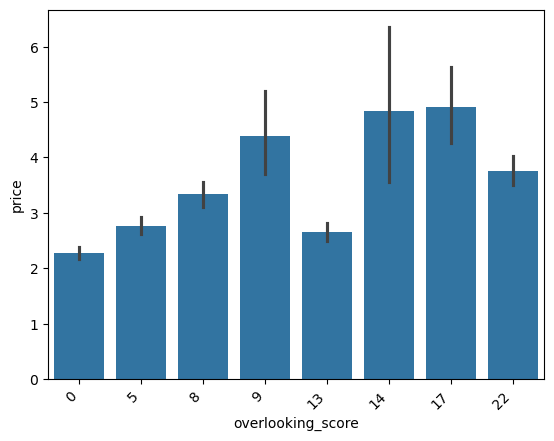

In [412]:
# using price mean 
sns.barplot(data=df, x='overlooking_score', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

## method 2 : OHE 

In [413]:
# Perform One-Hot Encoding
overlooking_ohe = df['overlooking'].str.get_dummies(sep=', ')

# Concatenate OHE result with the original DataFrame
df = pd.concat([df, overlooking_ohe], axis=1)

In [414]:
df[['overlooking','main road', 'garden/park', 'pool']].sample(10)

,overlooking,main road,garden/park,pool
3333,unknown,0,0,0
842,unknown,0,0,0
391,unknown,0,0,0
1017,unknown,0,0,0
3598,main road,1,0,0
603,unknown,0,0,0
621,unknown,0,0,0
10878,unknown,0,0,0
5663,garden/park,0,1,0
2603,unknown,0,0,0


## method 3: actual weighatage 

In [415]:
import pandas as pd

# Function to check if a property has extra rooms
def has_extra_rooms(rooms):
    return rooms != 'unknown'

df['has_overlooking'] = df['overlooking'].apply(has_extra_rooms)

# Calculate average prices
avg_price_with_overlooking = df[df['has_overlooking']]['price'].mean()
avg_price_without_overlooking = df[~df['has_overlooking']]['price'].mean()

# Calculate price differences
price_difference = avg_price_with_overlooking - avg_price_without_overlooking
percentage_increase = (price_difference / avg_price_without_overlooking) * 100

# Analyze impact of each overlooking
df_expanded = df.copy()
df_expanded = df_expanded.assign(overlooking=df_expanded.overlooking.str.split(', ')).explode('overlooking')

impact = df_expanded.groupby('overlooking')['price'].mean() - avg_price_without_overlooking
percentage_impact = (impact / avg_price_without_overlooking) * 100

# Assign weightage (out of 10)
def assign_weightage(percentage):
    return round((percentage / percentage_impact.max()) * 10, 1)  # Normalize to 10

weightage = percentage_impact.apply(assign_weightage)

# Display results
print("Average price with extra rooms:", avg_price_with_overlooking)
print("Average price without extra rooms:", avg_price_without_overlooking)
print("Price increase (%):", percentage_increase)
print("Weightage per extra room type:")
print(weightage)

Average price with extra rooms: 3.2247674359944507
Average price without extra rooms: 2.2696192995716804
Price increase (%): 42.0840683106204
Weightage per extra room type:
overlooking
garden/park     6.3
main road       4.4
pool           10.0
unknown         0.0
Name: price, dtype: float64


In [416]:
# Define the weightage for each flooring type
weightages = {
    "main road": 4.4,
    "garden/park": 6.3,
    "pool": 10
}


# Function to calculate the combination score
def calculate_combination_actualscore(overlooking_combination):
    overlooking_types = [f.strip().lower() for f in overlooking_combination.split(",")]
    total_weight = sum(weightages.get(f, 0) for f in overlooking_types)
    #combination_score = total_weight / len(overlooking_types)
    return round(total_weight, 2)

# Apply the function to the dataframe
df["actual_overlooking_score"] = df["overlooking"].apply(calculate_combination_actualscore)

In [417]:
df[['overlooking',"actual_overlooking_score"]].sample(10)

,overlooking,actual_overlooking_score
1057,main road,4.4
5146,"garden/park, main road",10.7
1650,unknown,0.0
5191,"garden/park, main road, pool",20.7
968,main road,4.4
4305,garden/park,6.3
971,main road,4.4
7889,unknown,0.0
2152,unknown,0.0
1116,unknown,0.0


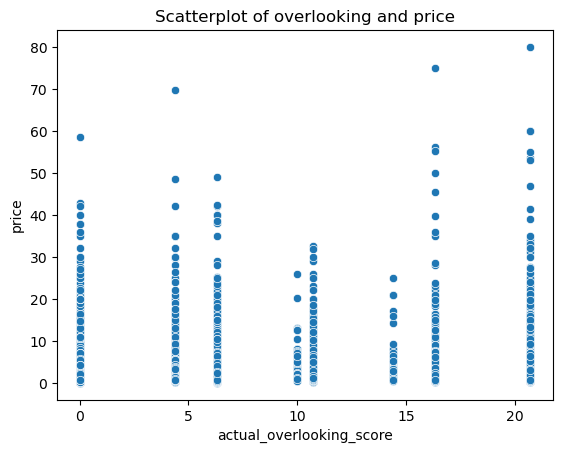

In [418]:
# Filter data for 'mumbai'
#filtered_df = df[df['addressregion'] == 'thane']

sns.scatterplot(x=df['actual_overlooking_score'], y=df['price'])

# Add labels and title
plt.xlabel('actual_overlooking_score')
plt.ylabel('price')
plt.title('Scatterplot of overlooking and price')
#plt.legend(title='Address Region')
plt.show()

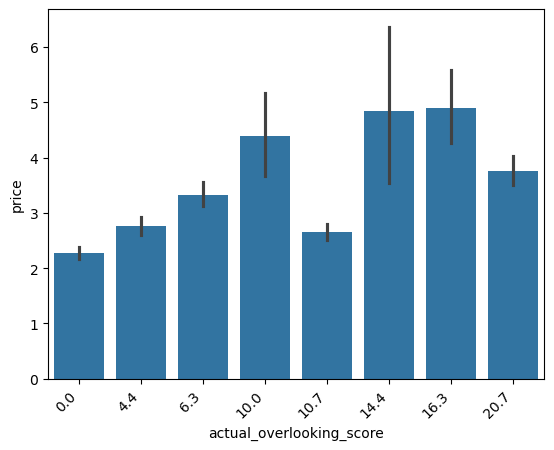

In [419]:
# using price mean 
sns.barplot(data=df, x='actual_overlooking_score', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

# extra_room

In [420]:
df['extra_rooms'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: extra_rooms, dtype: object

In [421]:
df['extra_rooms'].value_counts()

extra_rooms
none of these                  3005
store                          1112
puja                            743
puja, servant, store, study     316
study                           309
servant                         296
puja, store                     229
puja, store, study              132
store, study                     89
servant, store                   86
puja, study                      77
puja, servant                    63
puja, servant, store             56
puja, servant, study             32
servant, store, study            29
servant, study                   24
Name: count, dtype: int64

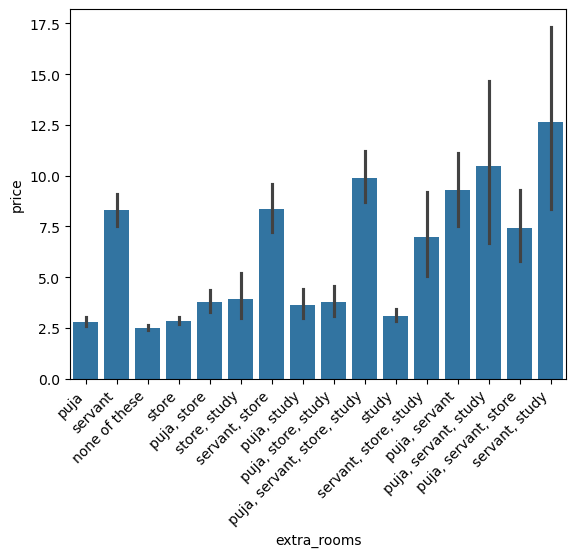

In [422]:
# using price mean 
sns.barplot(data=df, x='extra_rooms', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

## method 1:assign weightage

In [423]:
df['extra_rooms'].isna().sum()

5300

In [424]:
df['extra_rooms'] = df['extra_rooms'].fillna('unknown')

In [425]:
df['extra_rooms'].value_counts().index

Index(['unknown', 'none of these', 'store', 'puja',
       'puja, servant, store, study', 'study', 'servant', 'puja, store',
       'puja, store, study', 'store, study', 'servant, store', 'puja, study',
       'puja, servant', 'puja, servant, store', 'puja, servant, study',
       'servant, store, study', 'servant, study'],
      dtype='object', name='extra_rooms')

In [426]:
import pandas as pd

# Function to check if a property has extra rooms
def has_extra_rooms(rooms):
    return rooms != 'unknown' and rooms != 'none of these'

df['has_extra_rooms'] = df['extra_rooms'].apply(has_extra_rooms)

# Calculate average prices
avg_price_with_extra = df[df['has_extra_rooms']]['price'].mean()
avg_price_without_extra = df[~df['has_extra_rooms']]['price'].mean()

# Calculate price differences
price_difference = avg_price_with_extra - avg_price_without_extra
percentage_increase = (price_difference / avg_price_without_extra) * 100

# Analyze impact of each extra room
df_expanded = df.copy()
df_expanded = df_expanded.assign(extra_rooms=df_expanded.extra_rooms.str.split(', ')).explode('extra_rooms')

impact = df_expanded.groupby('extra_rooms')['price'].mean() - avg_price_without_extra
percentage_impact = (impact / avg_price_without_extra) * 100

# Assign weightage (out of 10)
def assign_weightage(percentage):
    return round((percentage / percentage_impact.max()) * 10, 1)  # Normalize to 10

weightage = percentage_impact.apply(assign_weightage)

# Display results
print("Average price with extra rooms:", avg_price_with_extra)
print("Average price without extra rooms:", avg_price_without_extra)
print("Price increase (%):", percentage_increase)
print("Weightage per extra room type:")
print(weightage)

Average price with extra rooms: 4.547188421931534
Average price without extra rooms: 2.1961772426249246
Price increase (%): 107.05015668483222
Weightage per extra room type:
extra_rooms
none of these     0.5
puja              4.1
servant          10.0
store             3.5
study             5.6
unknown          -0.3
Name: price, dtype: float64


In [427]:
# Define the weightage for each extra_rooms type
weightages = {
    "puja": 4.1,
    "servant": 10.0,
    "study": 5.6,
    "store":3.5
}


# Function to calculate the combination score
def calculate_combination_score(extra_rooms_combination):
    extra_rooms_types = [f.strip().lower() for f in extra_rooms_combination.split(",")]
    total_weight = sum(weightages.get(f, 0) for f in extra_rooms_types)
    #combination_score = total_weight / len(extra_rooms_types)
    return round(total_weight, 2)

# Apply the function to the dataframe
df["extra_rooms_score"] = df["extra_rooms"].apply(calculate_combination_score)

In [428]:
df["extra_rooms_score"].value_counts() 

extra_rooms_score
0.0     8305
3.5     1112
4.1      743
23.2     316
5.6      309
10.0     296
7.6      229
13.2     132
9.1       89
13.5      86
9.7       77
14.1      63
17.6      56
19.7      32
19.1      29
15.6      24
Name: count, dtype: int64

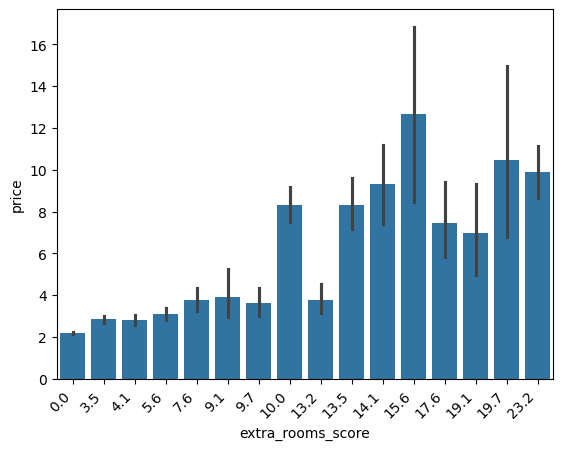

In [429]:
# using price mean 
sns.barplot(data=df, x='extra_rooms_score', y='price')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

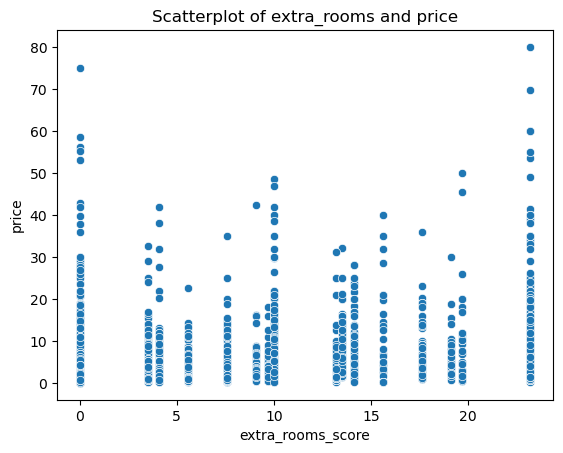

In [430]:
# Filter data for 'mumbai'
#filtered_df = df[df['addressregion'] == 'thane']

sns.scatterplot(x=df['extra_rooms_score'], y=df['price'])

# Add labels and title
plt.xlabel('extra_rooms_score')
plt.ylabel('price')
plt.title('Scatterplot of extra_rooms and price')
#plt.legend(title='Address Region')
plt.show()

# price with numerical columns

# available_units vs price 

In [431]:
df['price'].head()

0    1.80
1    2.37
2    1.80
3    1.64
4    1.26
Name: price, dtype: float64

<Axes: xlabel='available_units', ylabel='price'>

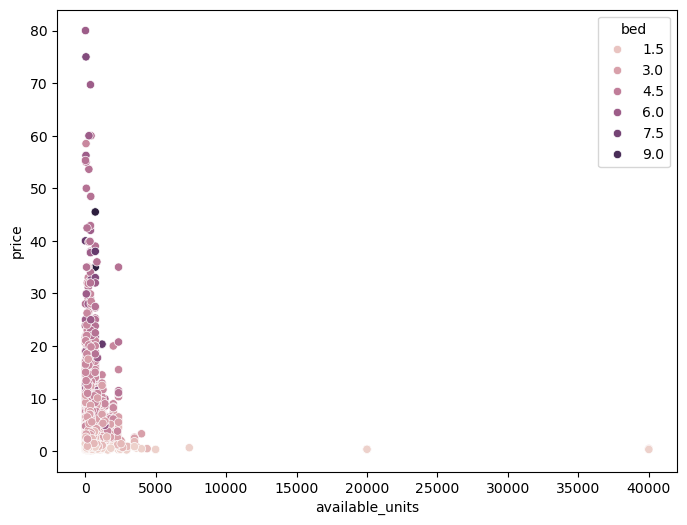

In [432]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['available_units'],y=df['price'],hue=df['bed'])

# observation 
- as price increases then available_units decreases
- most data clustered around low unit availability
- few outliers have very high available_units
- higher bed counts (darker colors) are generally associated with higher prices, while properties with lower bed counts (lighter colors) tend to have lower prices.

# amenities_score

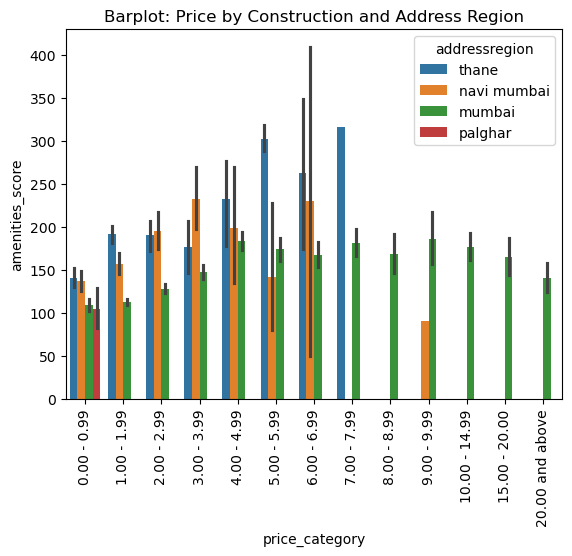

In [433]:
sns.barplot(x='price_category', y='amenities_score',hue='addressregion', data=df)
plt.xticks(rotation='vertical')
plt.title("Barplot: Price by Construction and Address Region")
plt.show()